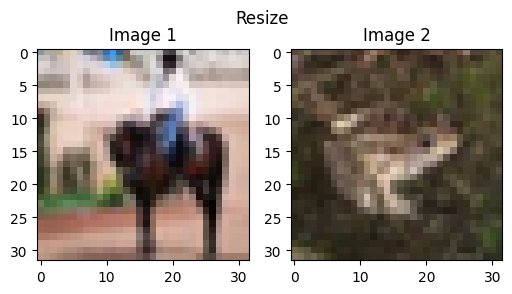

Image1 Resize: shape=torch.Size([3, 32, 32]), min=0.000, max=0.996
Image2 Resize: shape=torch.Size([3, 32, 32]), min=0.063, max=0.918


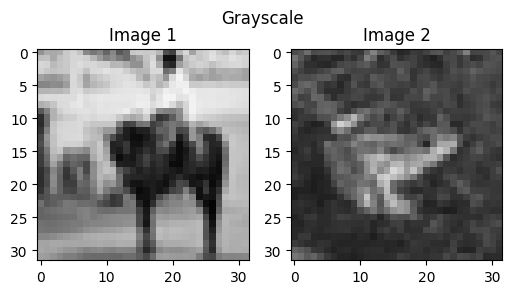

Image1 Grayscale: shape=torch.Size([3, 32, 32]), min=0.016, max=0.957
Image2 Grayscale: shape=torch.Size([3, 32, 32]), min=0.114, max=0.843


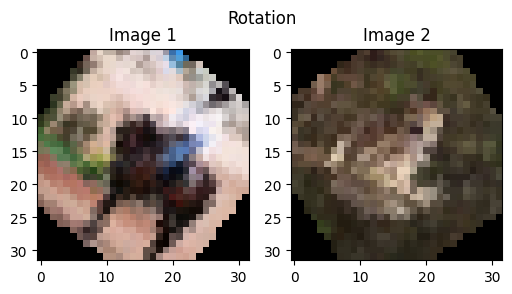

Image1 Rotation: shape=torch.Size([3, 32, 32]), min=0.000, max=0.996
Image2 Rotation: shape=torch.Size([3, 32, 32]), min=0.000, max=0.918


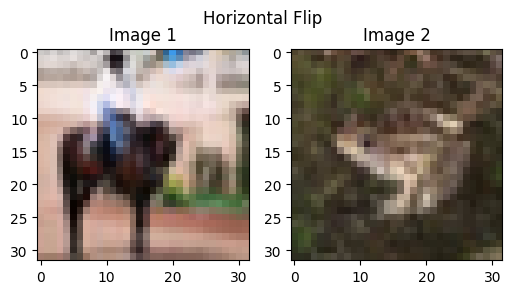

Image1 Flip: shape=torch.Size([3, 32, 32]), min=0.000, max=0.996
Image2 Flip: shape=torch.Size([3, 32, 32]), min=0.063, max=0.918


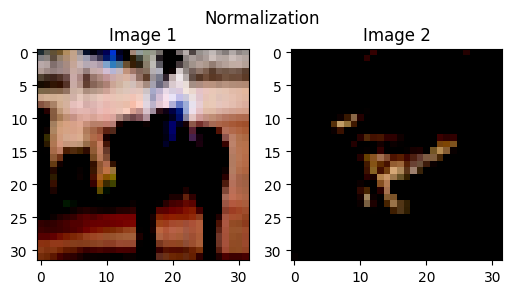

Image1 Normalize: shape=torch.Size([3, 32, 32]), min=-1.000, max=0.992
Image2 Normalize: shape=torch.Size([3, 32, 32]), min=-0.875, max=0.835


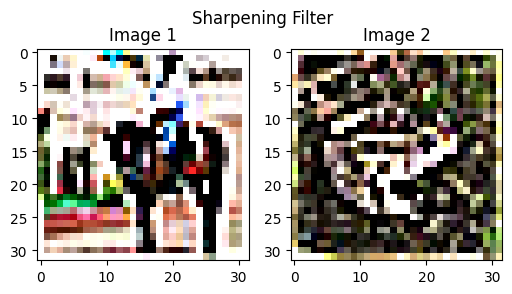

Image1 Sharpen: shape=torch.Size([3, 32, 32]), min=-2.318, max=4.831
Image2 Sharpen: shape=torch.Size([3, 32, 32]), min=-2.067, max=3.525
Final tensor shape: torch.Size([2, 3, 32, 32])


In [ ]:
# ------------------------------------------------------------
# STEP 0: Import all required libraries
# ------------------------------------------------------------
import torch                      # PyTorch for tensors and deep learning
import torchvision                # Torchvision for datasets and image transforms
import torchvision.transforms as T # Common image transformations
import matplotlib.pyplot as plt   # For plotting and visualization
import numpy as np                # For numerical operations
import torch.nn.functional as F   # For custom filters (convolution)

# ------------------------------------------------------------
# STEP 1: Load dataset and select two images
# ------------------------------------------------------------
# We use CIFAR-10 dataset (color images, 32x32 pixels)
# 'train=True' loads training set, 'download=True' will fetch data if not present
dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True)

# Select two sample images from dataset
# Each dataset item is a tuple: (image, label)
img1, _ = dataset[11]   # First image
img2, _ = dataset[22]   # Second image

# ------------------------------------------------------------
# STEP 2: Define preprocessing transformations
# ------------------------------------------------------------
# We will apply 5 transformations: Resize, Grayscale, Rotation, Flip, Normalization
resize = T.Resize((64, 64))                # Resize image to 64x64 pixels
grayscale = T.Grayscale(num_output_channels=3)  # Convert to grayscale but keep 3 channels
rotate = T.RandomRotation(degrees=45)      # Randomly rotate image within ±45 degrees
flip = T.RandomHorizontalFlip(p=1.0)       # Always flip image horizontally
normalize = T.Normalize(mean=[0.5,0.5,0.5], std=[0.5,0.5,0.5])  # Normalize pixel values to [-1,1]

# ------------------------------------------------------------
# STEP 2b: Define custom sharpening filter (Bonus Challenge)
# ------------------------------------------------------------
def custom_sharpen(img_tensor):
    """
    Apply a sharpening filter using convolution.
    This enhances edges and makes image look crisper.
    """
    # Define sharpening kernel (3x3 matrix)
    kernel = torch.tensor([[-1,-1,-1],
                           [-1, 9,-1],
                           [-1,-1,-1]], dtype=torch.float32)

    # Reshape kernel to match convolution requirements
    kernel = kernel.unsqueeze(0).unsqueeze(0)  # Shape becomes [1,1,3,3]

    # Add batch dimension to image tensor
    img_tensor = img_tensor.unsqueeze(0)       # Shape becomes [1, C, H, W]

    # Apply convolution with kernel to each channel separately
    sharpened = F.conv2d(img_tensor, kernel.expand(3,1,3,3), padding=1, groups=3)

    # Remove batch dimension before returning
    return sharpened.squeeze(0)

# ------------------------------------------------------------
# STEP 3: Helper functions for visualization and analysis
# ------------------------------------------------------------
def show_images(imgA, imgB, title):
    """
    Display two images side by side with a title.
    """
    fig, axes = plt.subplots(1,2, figsize=(6,3))
    # Convert tensor [C,H,W] to numpy [H,W,C] for plotting
    axes[0].imshow(np.transpose(imgA.numpy(), (1,2,0)))
    axes[0].set_title("Image 1")
    axes[1].imshow(np.transpose(imgB.numpy(), (1,2,0)))
    axes[1].set_title("Image 2")
    plt.suptitle(title)
    plt.show()

def analyze(img_tensor, name):
    """
    Print shape and pixel value range of image tensor.
    """
    print(f"{name}: shape={img_tensor.shape}, min={img_tensor.min().item():.3f}, max={img_tensor.max().item():.3f}")

# ------------------------------------------------------------
# STEP 4: Convert PIL images to tensors
# ------------------------------------------------------------
to_tensor = T.ToTensor()   # Converts PIL image to PyTorch tensor [C,H,W] with values in [0,1]

img1_t = to_tensor(img1)
img2_t = to_tensor(img2)

# ------------------------------------------------------------
# STEP 5: Apply transformations one by one
# ------------------------------------------------------------

# 1. Resize
img1_r, img2_r = resize(img1), resize(img2)
img1_r, img2_r = to_tensor(img1_r), to_tensor(img2_r)
show_images(img1_r, img2_r, "Resize")
analyze(img1_r, "Image1 Resize"); analyze(img2_r, "Image2 Resize")

# 2. Grayscale
img1_g, img2_g = grayscale(img1), grayscale(img2)
img1_g, img2_g = to_tensor(img1_g), to_tensor(img2_g)
show_images(img1_g, img2_g, "Grayscale")
analyze(img1_g, "Image1 Grayscale"); analyze(img2_g, "Image2 Grayscale")

# 3. Rotation
img1_rot, img2_rot = rotate(img1), rotate(img2)
img1_rot, img2_rot = to_tensor(img1_rot), to_tensor(img2_rot)
show_images(img1_rot, img2_rot, "Rotation")
analyze(img1_rot, "Image1 Rotation"); analyze(img2_rot, "Image2 Rotation")

# 4. Horizontal Flip
img1_f, img2_f = flip(img1), flip(img2)
img1_f, img2_f = to_tensor(img1_f), to_tensor(img2_f)
show_images(img1_f, img2_f, "Horizontal Flip")
analyze(img1_f, "Image1 Flip"); analyze(img2_f, "Image2 Flip")

# 5. Normalization
img1_n, img2_n = normalize(img1_t), normalize(img2_t)
show_images(img1_n, img2_n, "Normalization")
analyze(img1_n, "Image1 Normalize"); analyze(img2_n, "Image2 Normalize")

# Bonus: Sharpening Filter
img1_s, img2_s = custom_sharpen(img1_t), custom_sharpen(img2_t)
show_images(img1_s, img2_s, "Sharpening Filter")
analyze(img1_s, "Image1 Sharpen"); analyze(img2_s, "Image2 Sharpen")

# ------------------------------------------------------------
# STEP 6: Combine final processed images into one tensor
# ------------------------------------------------------------
# Stack both images into a batch tensor of shape [batch_size, C, H, W]
final_batch = torch.stack([img1_s, img2_s], dim=0)
print("Final tensor shape:", final_batch.shape)

# Expected output: torch.Size([2, 3, 32, 32]) or [2, 3, 64, 64] depending on resize
